# Pymaceuticals Inc.
---

### Analysis

- Most mice were treated using Capomulin and Ramicane.
- There is strong correlation between weight and tumor volume for mice treated with Capomulin, where the heavier the mice, the larger the tumor.
- Mouse l509's tumor volume decreased with Capomulin treatments.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [5]:
# Checking the number of mice - use .unique()
len(study_data_complete["Mouse ID"].unique())


249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids[0]


'g989'

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == duplicate_mouse_ids[0]]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# use .isin()
clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [17]:
# Checking the number of mice in the clean DataFrame.
len(study_data_complete["Mouse ID"].unique())

249

## Summary Statistics

In [27]:
# Calculate the means
means = clean_study_data_complete.groupby("Drug Regimen").mean(numeric_only=True)
means["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [35]:
# Create a summary dictionary
summaryDict = {
    "Mean Tumor Volume": means["Tumor Volume (mm3)"]
}

df = pd.DataFrame(summaryDict)
df

,Mean Tumor Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [41]:
# Calculate the medians
medians = clean_study_data_complete.groupby("Drug Regimen").median(numeric_only=True)
medians["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [43]:
# Create a summary dictionary
summaryDict = {
    "Mean Tumor Volume": means["Tumor Volume (mm3)"],
    "Median Tumor Volume": medians["Tumor Volume (mm3)"]
}

df = pd.DataFrame(summaryDict)
df

,Mean Tumor Volume,Median Tumor Volume
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [47]:
# Calculate the variances
variances = clean_study_data_complete.groupby("Drug Regimen").var(numeric_only=True)
variances["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [51]:
# Create a summary dictionary
summaryDict = {
    "Mean Tumor Volume": means["Tumor Volume (mm3)"],
    "Median Tumor Volume": medians["Tumor Volume (mm3)"],
    "Tumor Volume Variance": variances["Tumor Volume (mm3)"]
}

df = pd.DataFrame(summaryDict)
df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance
Drug Regimen,,,
Capomulin,40.675741,41.557809,24.947764
Ceftamin,52.591172,51.776157,39.290177
Infubinol,52.884795,51.820584,43.128684
Ketapril,55.235638,53.698743,68.553577
Naftisol,54.331565,52.509285,66.173479
Placebo,54.033581,52.288934,61.168083
Propriva,52.320930,50.446266,43.852013
Ramicane,40.216745,40.673236,23.486704
Stelasyn,54.233149,52.431737,59.450562


In [53]:
# Calculate the standard deviations
stds = clean_study_data_complete.groupby("Drug Regimen").std(numeric_only=True)
stds["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [55]:
# Create a summary dictionary
summaryDict = {
    "Mean Tumor Volume": means["Tumor Volume (mm3)"],
    "Median Tumor Volume": medians["Tumor Volume (mm3)"],
    "Tumor Volume Variance": variances["Tumor Volume (mm3)"],
    "Tumor Volume Std. Dev.": stds["Tumor Volume (mm3)"]
}

df = pd.DataFrame(summaryDict)
df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [57]:
# Calculate the standard errors
sems = clean_study_data_complete.groupby("Drug Regimen").sem(numeric_only=True)
sems["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [59]:
# Create a summary dictionary
summaryDict = {
    "Mean Tumor Volume": means["Tumor Volume (mm3)"],
    "Median Tumor Volume": medians["Tumor Volume (mm3)"],
    "Tumor Volume Variance": variances["Tumor Volume (mm3)"],
    "Tumor Volume Std. Dev.": stds["Tumor Volume (mm3)"],
    "Tumor Volume Std. Err.": sems["Tumor Volume (mm3)"]
}

df = pd.DataFrame(summaryDict)
df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [61]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2 = clean_study_data_complete.groupby("Drug Regimen").agg(
    {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
)
df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [63]:
# Generate the series for all drug regimens
counts = clean_study_data_complete["Drug Regimen"].value_counts()
counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

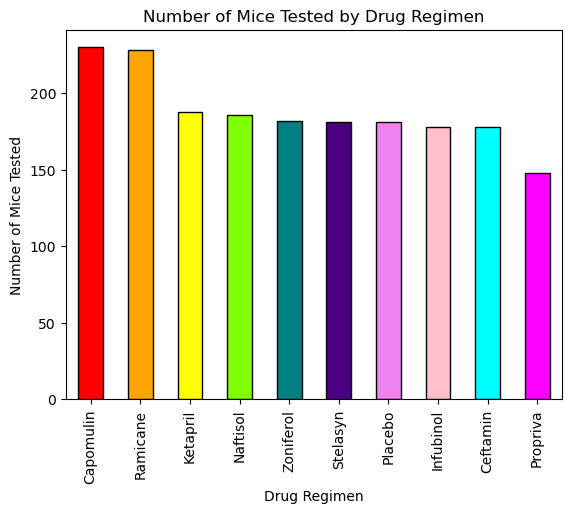

In [77]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts.plot(kind="bar",
           color=['red', 'orange', 'yellow', 'chartreuse', 'teal', 'indigo', 'violet', 'pink','cyan','magenta'],
           edgecolor="black")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show()

In [83]:
# Show the names of the regimens
counts.index.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148])

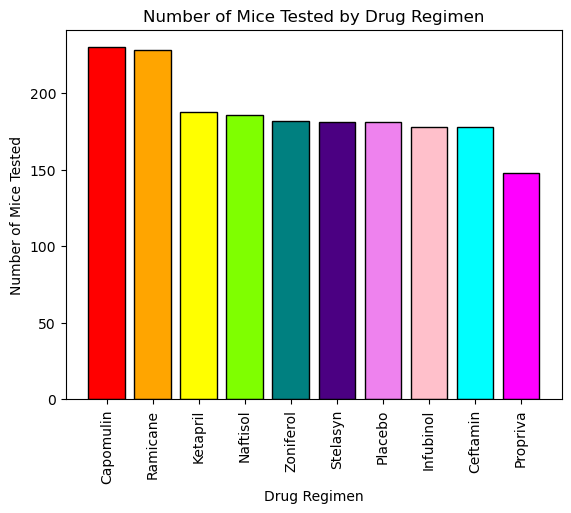

In [89]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index.values,
        counts.values,
           color=['red', 'orange', 'yellow', 'chartreuse', 'teal', 'indigo', 'violet', 'pink','cyan','magenta'],
           edgecolor="black")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show()

In [91]:
# Generate the series for both sexes
counts = clean_study_data_complete["Sex"].value_counts()
counts

Sex
Male      958
Female    922
Name: count, dtype: int64

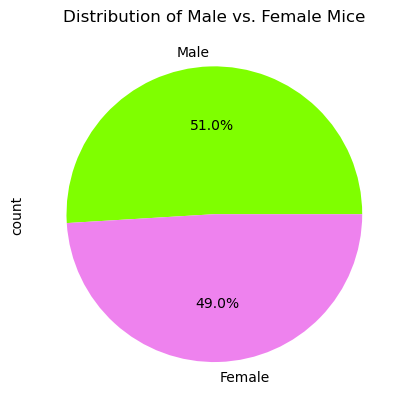

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=['chartreuse','violet']
)

plt.title("Distribution of Male vs. Female Mice")
plt.show()

In [113]:
# Show the names of the sexes
counts.index.values

array(['Male', 'Female'], dtype=object)

In [115]:
#Show the counts of the sexes
counts.values

array([958, 922])

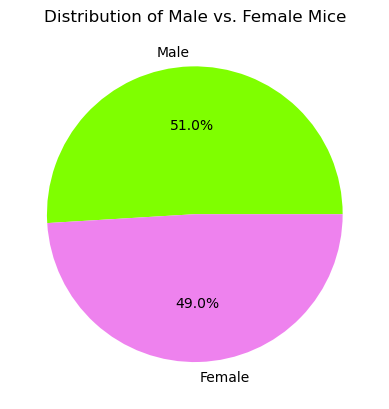

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
    counts.values,
    labels=counts.index.values,
    autopct="%1.1f%%",
    colors=['chartreuse','violet']
)

plt.title("Distribution of Male vs. Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [131]:
# Start by getting the last (greatest) timepoint for each mouse
#clean_study_data_complete.head()
maxTime = clean_study_data_complete.groupby("Mouse ID")["Timepoint"].max()
#Convert series to a dataframe by resetting the index of the series
maxTime = maxTime.reset_index()
maxTime.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [125]:
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [133]:
# Merge data for max times of each mouse
merged_data = maxTime.merge(clean_study_data_complete, on=["Mouse ID", "Timepoint"], how="left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [139]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list= []

In [154]:
for treatment in treatment_list:
    print(treatment)
  # Locate the rows which contain mice on each drug and get the tumor volumes
info = merged_data.loc[merged_data["Drug Regimen"] == treatment]
info

Capomulin
Ramicane
Infubinol
Ceftamin


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
3,a275,45,62.999356,3,Ceftamin,Female,20,28
21,b447,0,45.000000,0,Ceftamin,Male,2,30
22,b487,25,56.057749,1,Ceftamin,Female,6,28
25,b759,30,55.742829,1,Ceftamin,Female,12,25
58,f436,15,48.722078,2,Ceftamin,Female,3,25
75,h531,5,47.784682,0,Ceftamin,Male,5,27
88,j296,45,61.849023,3,Ceftamin,Female,24,30
94,k210,45,68.923185,3,Ceftamin,Male,15,28
106,l471,45,67.748662,1,Ceftamin,Female,7,28
107,l490,30,57.918381,3,Ceftamin,Male,24,26


In [160]:
for treatment in treatment_list:
    print(treatment)
  # Locate the rows which contain mice on each drug and get the tumor volumes
final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

final_tumor_vol

Capomulin
Ramicane
Infubinol
Ceftamin


3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [182]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # Add each series to the empty tumor volume list
    tumor_vol_list.append(final_tumor_vol)

    #Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles [0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    if len(outliers) == 0:
        print(f"{treatment}'s potential outliers: None")
    else:
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output += f"{o} "
            print(output)

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458 
Ceftamin's potential outliers: None


/var/folders/hz/mzfgkgwx3szcjwz4p27ckpx80000gn/T/ipykernel_47236/235493427.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=flierprops)


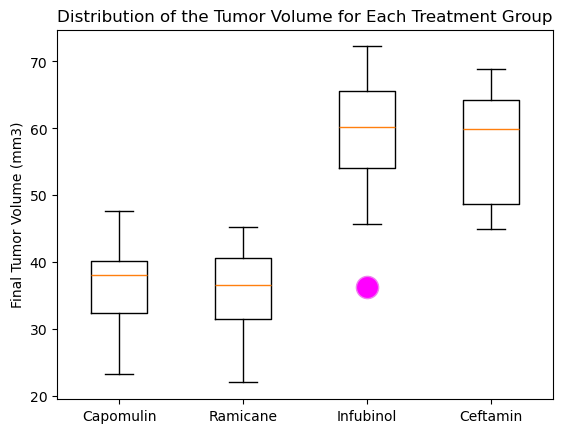

In [190]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='magenta', markersize=16,
                  markeredgecolor='violet')
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Distribution of the Tumor Volume for Each Treatment Group")
plt.show()

## Line and Scatter Plots

In [192]:
capomulinDF = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capomulinDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [202]:
l509Data = capomulinDF.loc[capomulinDF["Mouse ID"] == "l509"]
l509Data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


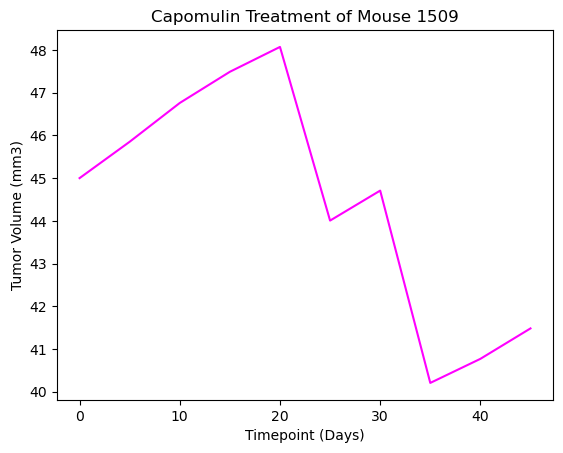

In [204]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(l509Data["Timepoint"],
        l509Data["Tumor Volume (mm3)"],
        color="magenta")
plt.title("Capomulin Treatment of Mouse 1509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [210]:
# Group by the Mouse ID and take the means
capomulinAveragesDF = capomulinDF.groupby("Mouse ID").mean(numeric_only=True)
capomulinAveragesDF.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


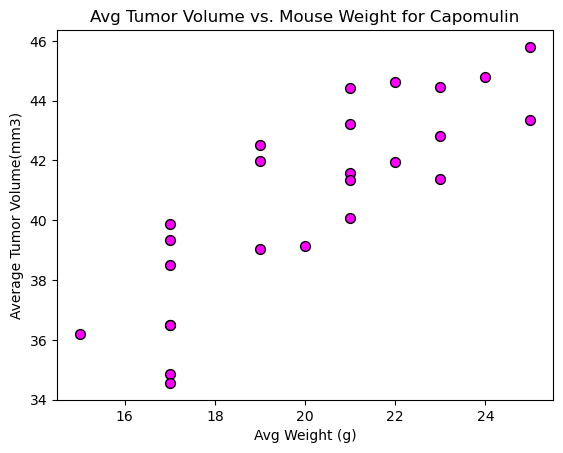

In [216]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(
    capomulinAveragesDF["Weight (g)"],
    capomulinAveragesDF["Tumor Volume (mm3)"],
    facecolor="magenta",
    edgecolor="black",
    s=50
       
)

plt.xlabel("Avg Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.title("Avg Tumor Volume vs. Mouse Weight for Capomulin")

plt.show()


## Correlation and Regression

In [218]:
corr = st.pearsonr(capomulinAveragesDF['Weight (g)'], capomulinAveragesDF['Tumor Volume (mm3)'])[0]
corr

0.8419363424694721

In [220]:
x_values = capomulinAveragesDF["Weight (g)"]
y_values = capomulinAveragesDF["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulinAveragesDF['Weight (g)'],
                                                          capomulinAveragesDF[('Tumor Volume (mm3)')])
regressValue = x_values * slope + intercept
lineEQ = f"y = {slope: .2f}x + {intercept: .2f}"


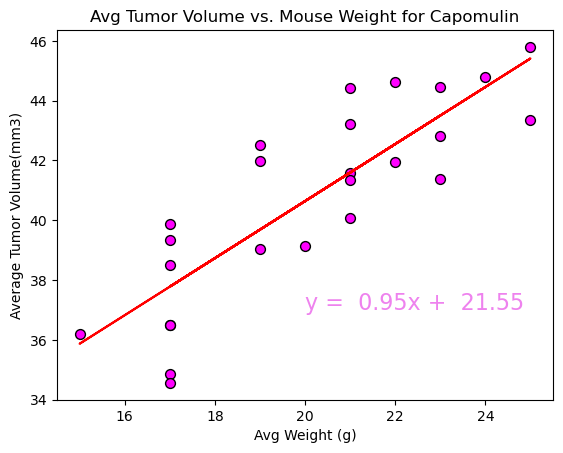

In [232]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.scatter(
    x_values,
    y_values,
    facecolor="magenta",
    edgecolor="black",
    s=50       
)

plt.plot(x_values, regressValue, "r-")
plt.annotate(lineEQ, (20, 37), fontsize=16, color="violet")

plt.xlabel("Avg Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.title("Avg Tumor Volume vs. Mouse Weight for Capomulin")

plt.show()